In [6]:
from main_sbm import SBM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig

In [7]:
def generate_graph_bicluster(Sr, Sc, thetas, random_seed = None, edge = "binary"):
    # Kr = thetas.shape[0]
    # Kc = thetas.shape[1]

    N = np.sum(Sr)

    Hr = []
    c = 0
    for i in Sr:
        for j in range(i):
            Hr += [c]
        c+=1

    Hc = []
    c = 0
    for i in Sc:
        for j in range(i):
            Hc += [c]
        c+=1

    if isinstance(random_seed, int):
        np.random.seed(random_seed)

    X = np.zeros((N,N))
    if edge == "binary":
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                X[i, j] = np.random.binomial(1, thetas[Hr[i], Hc[j]])
    elif edge == "weighted":
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                X[i, j] = np.random.poisson(thetas[Hr[i], Hc[j]], 1)

    return X

def cluster_summs(Z, ret = False):
    temp_Z = []
    mean_lenght = 0
    mean_nodes = 0
    for i in range(len(Z)):
        current_z = np.sum(Z[i], 0)
        temp_Z.append(current_z)
        mean_lenght += len(current_z)
        mean_nodes += np.mean(current_z)

    mean_lenght /= len(Z)
    mean_nodes /= len(Z)

    print('mean number of clusters', mean_lenght)
    print('mean nodes per cluster', mean_nodes)
    if ret:
        return temp_Z

In [8]:
# theta = np.array([[0.75, 0.25, 0.25, 0.25],
#                   [0.25, 0.75, 0.25, 0.25],
#                   [0.25, 0.25, 0.75, 0.25],
#                   [0.25, 0.25, 0.25, 0.75]])

# Sr = [15, 15, 15, 15]
# Sc = [15, 15, 15, 15]
n_clust = 5
theta = np.zeros((n_clust,n_clust)) + 0.25
np.fill_diagonal(theta, 0.75)

Sr = [20]*n_clust
Sc = [20]*n_clust


Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=40)

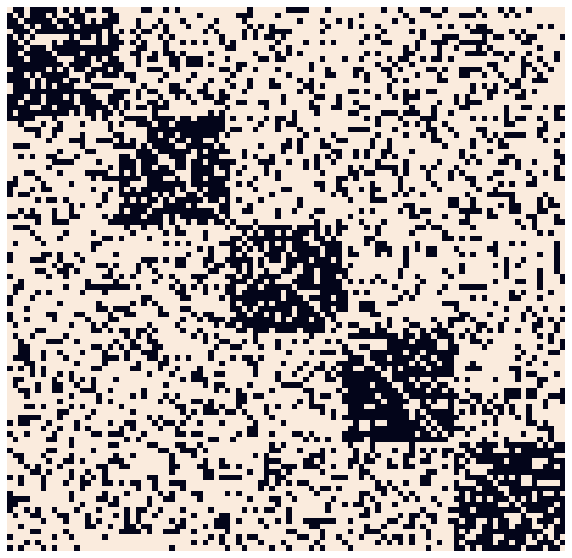

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cbar=False, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
# ax.set_yticks([i*10 for i in range(10)])
# ax.set(xticks=[i*10 for i in range(10)])
# ax.set_xlim([i*10 for i in range(10)])
# ax.set_ylim([i*10 for i in range(10)])
plt.show()

In [5]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}

In [107]:
DP = SBM(config, alpha_PY_r = 5, set_seed=42)

In [118]:
DP.fit(X,50000)

In [127]:
# with open("DP_Z_unipartite.pickle", "wb") as f:
#     pkl.dump(DP.Z, f)

In [131]:
# with open("results/DP_Z_unipartite.pickle", "rb") as f:
#     Z = pkl.load(f)

In [139]:
Z[-10:]

[array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0

In [13]:
config = {'directed': True,
          'binary': True,
          'unicluster': False}
DP_bi = SBM(config, alpha_PY_r = 2, alpha_PY_c=2, set_seed=42)

In [14]:
DP_bi.fit(X,10000)

In [22]:
DP_bi.Zr[-10:]

[array([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': False}
DP_bi_2 = SBM(config, alpha_PY_r = 2, alpha_PY_c=2, set_seed=42)

In [177]:
with open("results/DP_Z_bipartite.pickle", "wb") as f:
    pkl.dump(DP_bi.Z, f)

In [11]:
def expected_cl(n, sigma, theta, H):
    n = int(n)
    if H == np.Infinity:
        if sigma == 0:
            output = theta * np.sum(1/(theta - 1 + np.array([_ for _ in range(1,n)])))
        else:
            output = 1/sigma*np.exp(gammaln(theta + sigma + n) - gammaln(theta + sigma) + gammaln(theta + 1)) - theta/sigma 
    elif H < np.Infinity:
        if sigma == 0:
            idx = np.array([_ for _ in range(n-1)])
            output = H - H*np.exp(np.sum(np.log(idx + theta*(1 - 1/H)) - np.log(theta + idx)))
    return output

In [13]:
expected_cl(80, 0, 3.5, 50)

10.35410380685419

In [16]:
import pickle as pkl

In [14]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}
DM = SBM(config, prior_r = "DM", beta_DM_r= 3.5/50, K_DM_r=50, set_seed=42)

In [ ]:
DM.expe

In [17]:
DM.fit(X, 50000)

KeyboardInterrupt: 

In [ ]:
with open("results/DM_Z_unipartite.pickle", "wb") as f:
    pkl.dump(DM.Z, f)

In [5]:
cluster_summs(DM.Z[8000:10000])

NameError: name 'DM' is not defined

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}
PY = SBM(config, prior_r = "PY", alpha_PY_r=0.6, sigma_PY_r=-0.3, set_seed=42)

In [ ]:
PY.fit(X, 20000)
with open("results/PY_Z_unipartite.pickle", "wb") as f:
    pkl.dump(PY.Z, f)

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': True}
GN = SBM(config, prior_r = "GN", gamma_GN_r=0.45, set_seed=42)

In [ ]:
GN.fit(X, 20000)
with open("results/GN_Z_unipartite.pickle", "wb") as f:
    pkl.dump(GN.Z, f)

Test Bi-cluster

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': False}
DM_bi = SBM(config, prior_r = "DM", beta_DM_r= 3.5/50, K_DM_r=50,
                 prior_c = "DM", beta_DM_c= 3.5/50, K_DM_c=50 set_seed=42)

In [ ]:
DM_bi.fit(X, 20000)
with open("results/PY_Z_bipartite.pickle", "wb") as f:
    pkl.dump(DM_bi.Z, f)

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': False}
PY_bi = SBM(config, prior_r = "PY", alpha_PY_r=0.6, sigma_PY_r=-0.3,
                 prior_c = "PY", alpha_PY_c=0.6, sigma_PY_c=-0.3, set_seed=42)

In [ ]:
PY_bi.fit(X, 20000)
with open("results/PY_Z_bipartite.pickle", "wb") as f:
    pkl.dump(PY_bi.Z, f)

In [ ]:
config = {'directed': True,
          'binary': True,
          'unicluster': False}
GN_bi = SBM(config, prior_r = "GN", gamma_GN_r=0.45, set_seed=42,
                    prior_c = "GN", gamma_GN_c=0.45, set_seed=42)

In [ ]:
GN_bi.fit(X, 20000)
with open("results/GN_Z_bipartite.pickle", "wb") as f:
    pkl.dump(GN_bi.Z, f)

In [21]:
g = ig.Graph.Read_GML('celegansneural.gml')
X = np.array(g.get_adjacency(attribute = "value").data).astype(int)

In [22]:
config = {'directed': True,
          'binary': False,
          'unicluster': True}

In [23]:
w_DP = SBM(config, alpha_PY_r=1, set_seed=42)

In [24]:
w_DP.fit(X,2000)

In [25]:
Z = w_DP.Z

In [15]:
def retrieve_samples(Z, gap = 25, burn_in = True):
    if burn_in == True:
        burn_in = len(Z)//2   
    return Z[burn_in::gap]

def cluster_summs(Z, ret = False):
    temp_Z = []
    mean_lenght = 0
    mean_nodes = 0
    for i in range(len(Z)):
        current_z = np.sum(Z[i], 0)
        temp_Z.append(current_z)
        mean_lenght += len(current_z)
        mean_nodes += np.mean(current_z)

    mean_lenght /= len(Z)
    mean_nodes /= len(Z)

    print('mean number of clusters', mean_lenght)
    print('mean nodes per cluster', mean_nodes)
    if ret:
        return temp_Z

In [27]:
sample = retrieve_samples(Z)
print(cluster_summs(Z[250:]))

mean number of clusters 10.968
mean nodes per cluster 27.203665620094323
None


In [28]:
w_DP_1 = SBM(config, alpha_PY_r=1, set_seed=42)
w_DP_1.fit(X,200)

In [32]:
Z = w_DP.Z
sample = retrieve_samples(Z)
print(cluster_summs(sample))

mean number of clusters 11.25
mean nodes per cluster 26.55
None


In [33]:
w_DP_2 = SBM(config, alpha_PY_r=3, set_seed=42)
w_DP_2.fit(X,200)
Z = w_DP_2.Z
sample = retrieve_samples(Z)
print(cluster_summs(Z[int(len(Z)/2):]))

mean number of clusters 12.81
mean nodes per cluster 23.335652472527464
None


In [3]:
theta = np.array([[10, 0.5, 0.5, 0.5],
                  [0.5, 10, 0.5, 0.5],
                  [0.5, 0.5, 10, 0.5],
                  [0.5, 0.5, 0.5, 10]])

Sr = [15, 15, 15, 15]
Sc = [15, 15, 15, 15]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=42, edge="weighted")

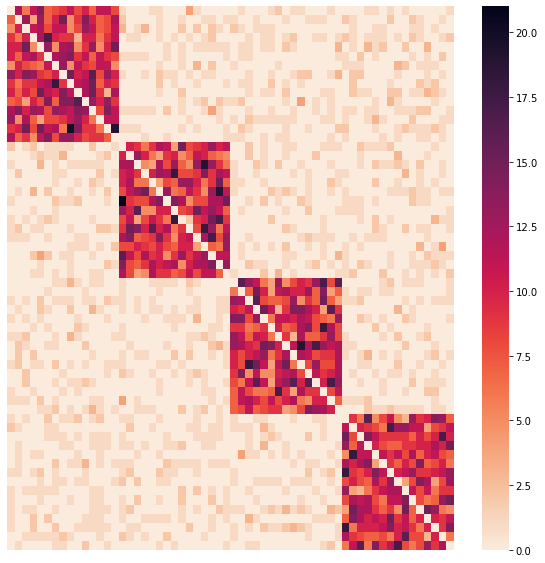

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
# ax.set_yticks([i*10 for i in range(10)])
# ax.set(xticks=[i*10 for i in range(10)])
# ax.set_xlim([i*10 for i in range(10)])
# ax.set_ylim([i*10 for i in range(10)])
plt.show()

In [6]:
config = {'directed': True,
          'binary': False,
          'unicluster': True}
w_DP = SBM(config, alpha_PY_r=10, set_seed=42)

In [7]:
w_DP.fit(X, 10)

In [8]:
w_DP.Z[-1]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [157]:
X[15:30,:15]

array([[2., 0., 1., 2., 0., 1., 1., 1., 1., 0., 0., 2., 0., 0., 1.],
       [0., 0., 0., 1., 2., 1., 1., 3., 0., 0., 0., 0., 1., 2., 0.],
       [1., 0., 0., 0., 3., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 2., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 2., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 2., 1., 0., 0.],
       [0., 1., 0., 3., 0., 2., 0., 0., 1., 0., 0., 1., 0., 2., 0.],
       [1., 0., 0., 0., 0., 0., 2., 1., 1., 2., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 2., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 2., 2., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 2.],
       [0., 0., 0., 2., 4., 2., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 2., 1.],
       [0., 0., 0., 1., 1., 0., 1.

In [4]:
theta = np.array([[2, 0.1, 0.1, 0.1],
                  [0.1, 2, 0.1, 0.1],
                  [0.1, 0.1, 2, 0.1],
                  [0.1, 0.1, 0.1, 2]])

Sr = [15, 15, 15, 15]
Sc = [15, 15, 15, 15]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=42, edge="weighted")

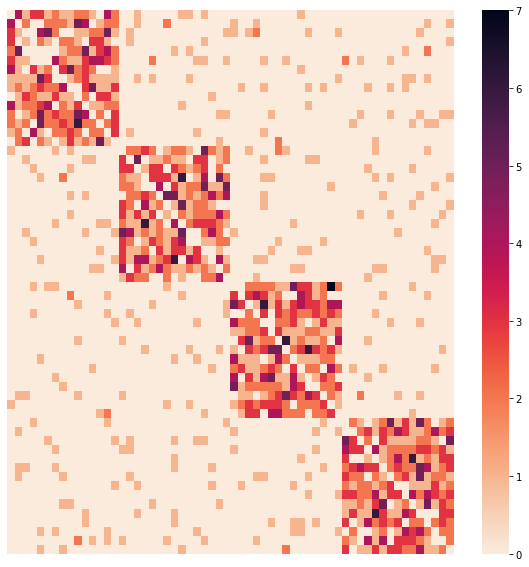

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
# ax.set_yticks([i*10 for i in range(10)])
# ax.set(xticks=[i*10 for i in range(10)])
# ax.set_xlim([i*10 for i in range(10)])
# ax.set_ylim([i*10 for i in range(10)])
plt.show()

In [10]:
config = {'directed': True,
          'binary': False,
          'unicluster': True}
w_DP = SBM(config, alpha_PY_r=10, set_seed=42)
w_DP.fit(X,1000)

In [11]:
w_DP.Z[-1:]

[array([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0.,

In [6]:
from irm_weighted import irm_directed_weighted
from collections import Counter

In [15]:
config = {'directed': True,
          'binary': False,
          'unicluster': False}
w_DP_bi = SBM(config, alpha_PY_r=1, alpha_PY_c=1, set_seed=42)
w_DP_bi.fit(X,1000)

In [16]:
Z_bi = w_DP_bi.Z
Zr = w_DP_bi.Zr
Zc = w_DP_bi.Zc

In [18]:
Zr

[array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 arr

In [5]:
g = ig.Graph.Read_GML('celegansneural.gml')
X = np.array(g.get_adjacency(attribute = "value").data).astype(int)

In [39]:
Z = irm_directed_weighted(X, 100, 1, 1, 1, print_iter=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [6]:
w_DP.fit(X,100)

In [15]:
Z = w_DP.Z[-1]

In [14]:
w_DP.Z[-1]

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
Z

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
Counter(np.argwhere(Z)[:,1])

Counter({8: 22, 1: 9, 2: 35, 5: 10, 3: 98, 0: 54, 6: 21, 7: 25, 4: 21, 9: 2})

In [18]:
Z

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])